In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#---------------------------------------
#Analytical solution
#---------------------------------------
a = 1.0
r0 = 0.8
h0 = 0.1
g = 9.81
omega = np.sqrt(8*g*h0/a**2)
#A = (a**2-h0**2)/(a**2+h0**2)
A = (a**4-r0**4)/(a**4+r0**4)

In [3]:
# %%writefile analytical.py
def bati(x,y):
    r = np.sqrt(x**2+y**2)
    return -h0*(1-r**2/a**2)

def analytical(t,x,y):
    r = np.sqrt(x**2+y**2)
    z = -h0*(1-r**2/a**2)
    eta = h0*(np.sqrt(1-A**2)/(1-A*np.cos(omega*t))-1. \
        -r**2/a**2*((1.-A**2)/(1.-A*np.cos(omega*t))**2-1.))
    u  = 1./(1.-A*np.cos(omega*t))*0.5*omega*x*A*np.sin(omega*t)
    v  = 1./(1.-A*np.cos(omega*t))*0.5*omega*y*A*np.sin(omega*t)
  
    #eta = np.where(eta<z, z, eta)
    #u = np.where(eta<z, 0., u)
    ##v = np.where(eta<z, 0., v)
    return eta,u,v
def shoreline1d(t):
    r = a**2*(1.-A*np.cos(omega*t))/np.sqrt(1.-A**2)
    r = np.sqrt(r)
    return r
def shoreline2d(t):
    """
    para dibujar la linea de costa en 2d
    t debe ser escalar
    """
    s = np.linspace(0,2*np.pi,100)
    r = shoreline1d(t)
    x1 = r *np.cos(s)
    y1 = r *np.sin(s)
    return x1,y1

In [4]:
x = np.linspace(-2,2,101)
y = np.linspace(-2,2,101)
x,y = np.meshgrid(x,y)
z = bati(x,y)
eta,u,v = analytical(0.0,x,y)
xshore, yshore = shoreline2d(0.0)


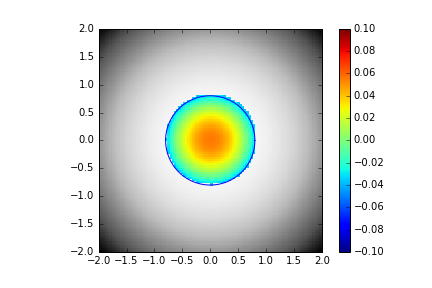
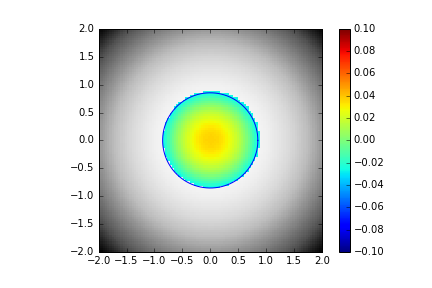
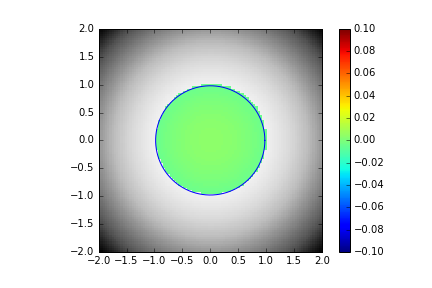
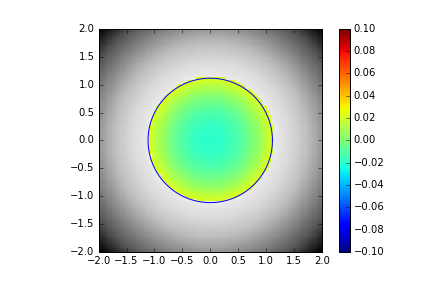
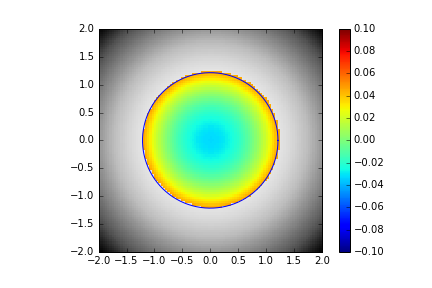
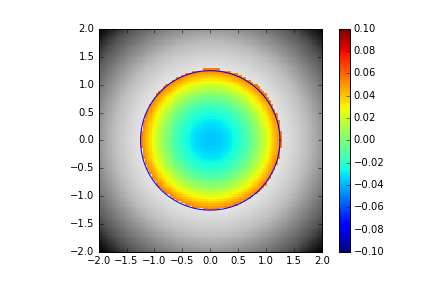
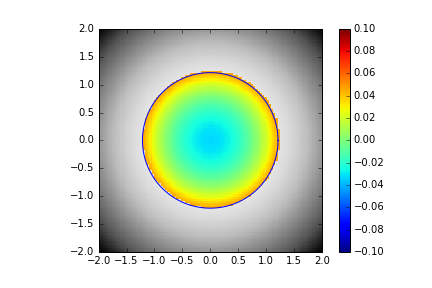
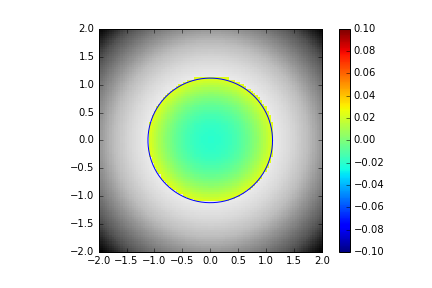
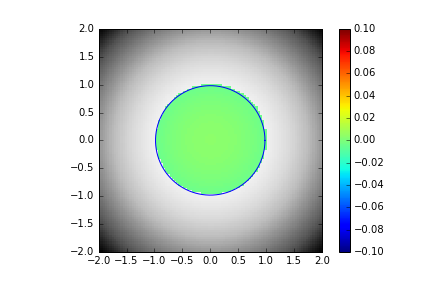
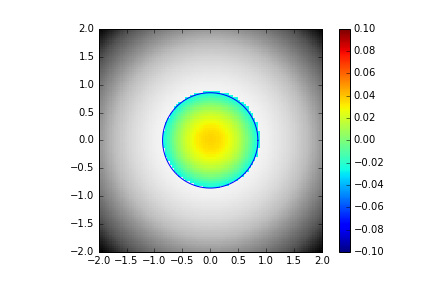
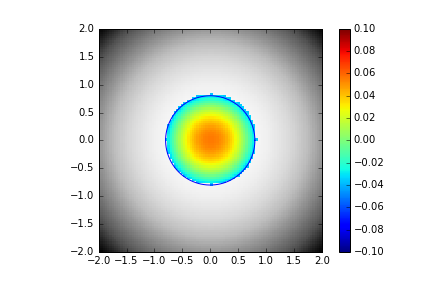
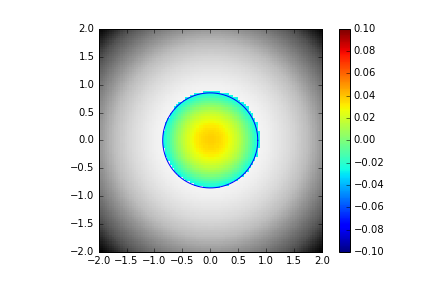
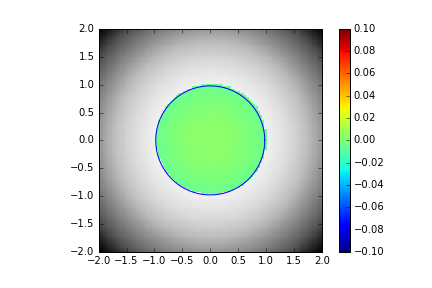
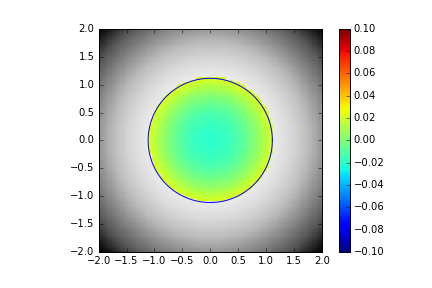
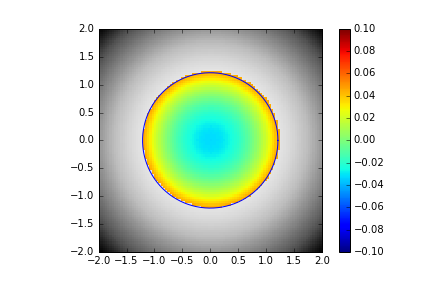
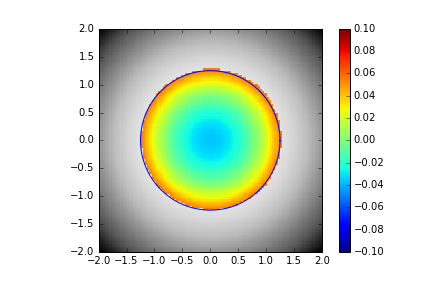
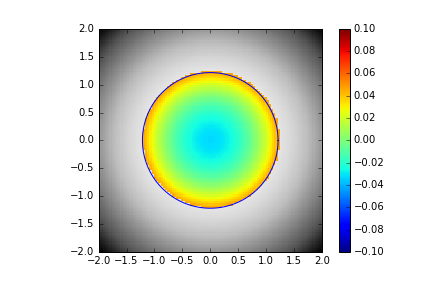
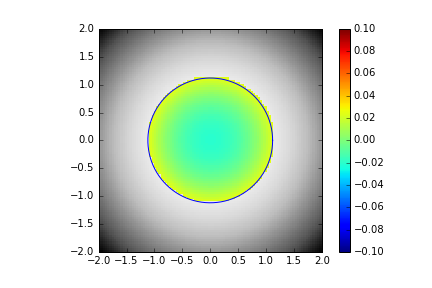
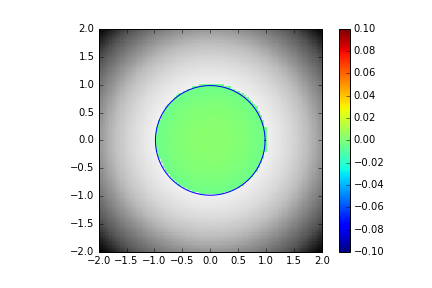
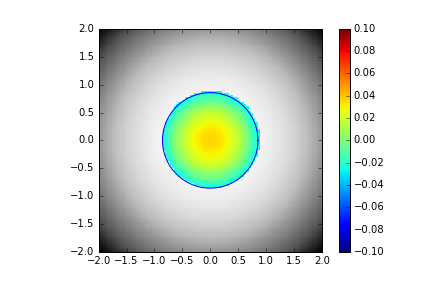
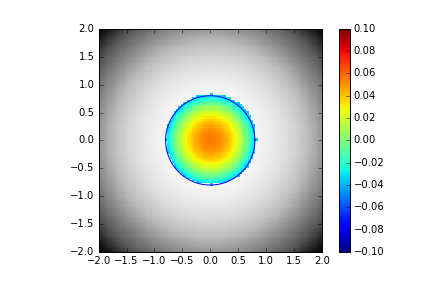
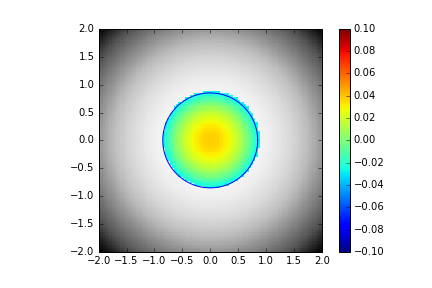
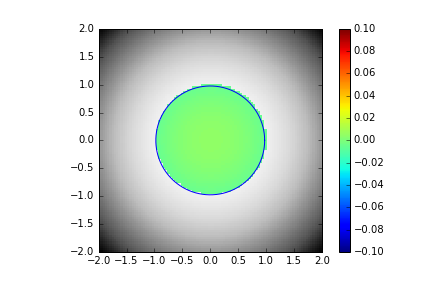
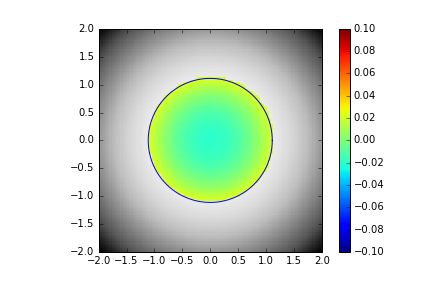
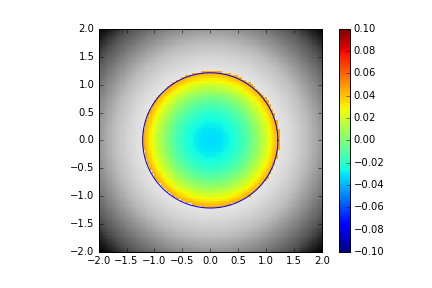
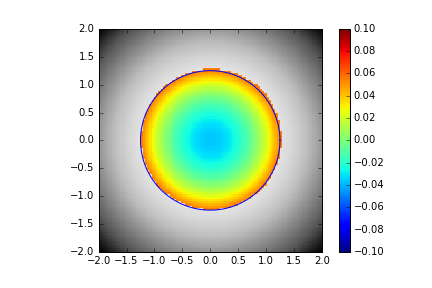
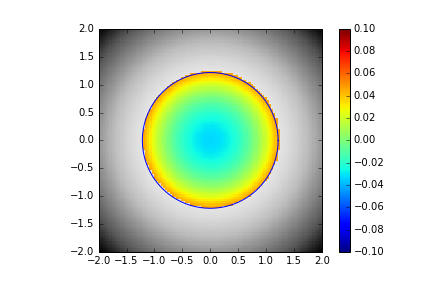
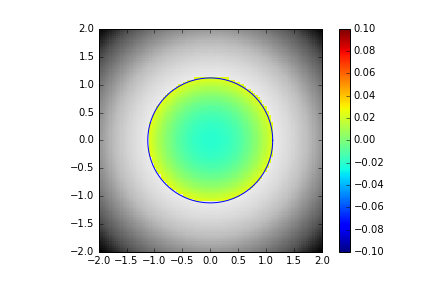
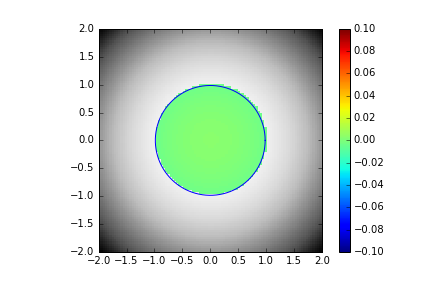
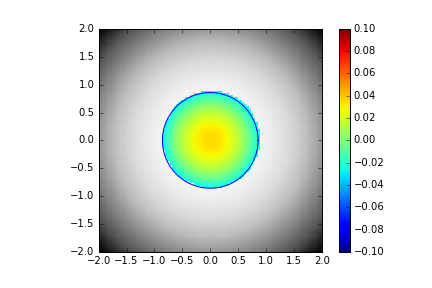

In [5]:
from matplotlib import animation
from JSAnimation import IPython_display


fig = plt.figure()
ax = plt.axes(xlim=(-2,2), ylim=(-2,2))
ax.set_aspect(1)
pc = ax.pcolormesh(x,y,np.ma.masked_where(eta<z,eta),vmin=-0.1,vmax=0.1)
l, = ax.plot(xshore,yshore)
fig.colorbar(pc)

def animate(i):
    xshore,yshore = shoreline2d(i*2.24/10)
    eta,u,v = analytical(i*2.24/10,x,y)
    z = bati(x,y)
    eta = np.ma.masked_where(eta<z,eta)
    z = np.ma.masked_where(1-eta.mask,z)
    ax.pcolormesh(x,y,z,cmap=plt.cm.Greys,vmin=-0.1,vmax=0.7)
    ax.pcolormesh(x,y,eta,vmin=-0.1,vmax=0.1)
#     pc.set_array(eta[:])
    l.set_data(xshore,yshore)
    return

animation.FuncAnimation(fig, animate, frames=30, interval=300)